# Teoría de inventarios, monoproducto:
---
- Autor: **[Rodrigo Maranzana](https://www.linkedin.com/in/rodrigo-maranzana/)**
- Año: **2020**
- Licencia: **[MIT License](https://github.com/harb-OR/casos_practicos/blob/master/LICENSE)**
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cálculo-de-Qopt:" data-toc-modified-id="Cálculo-de-Qopt:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cálculo de Qopt:</a></span></li><li><span><a href="#Cálculo-de-costo-de-adquisición:" data-toc-modified-id="Cálculo-de-costo-de-adquisición:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cálculo de costo de adquisición:</a></span></li><li><span><a href="#Cálculo-de-costo-de-almacenamiento:" data-toc-modified-id="Cálculo-de-costo-de-almacenamiento:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cálculo de costo de almacenamiento:</a></span></li><li><span><a href="#Cálculo-de-costo-de-pedido" data-toc-modified-id="Cálculo-de-costo-de-pedido-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cálculo de costo de pedido</a></span></li><li><span><a href="#Cálculo-de-costo-total-esperado-(CTE)" data-toc-modified-id="Cálculo-de-costo-total-esperado-(CTE)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cálculo de costo total esperado (CTE)</a></span></li><li><span><a href="#Ejemplo" data-toc-modified-id="Ejemplo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ejemplo</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import axes3d, art3d
from matplotlib import cm
from matplotlib.patches import Circle
%matplotlib notebook


## Cálculo de Qopt:
$\sqrt{\dfrac{2*k*d}{t*c1}}$

In [2]:
# Cantidad óptima:
def calcular_q_opt (k, d, t, c1):
    return np.sqrt((2*k*d)/(t*c1))

## Cálculo de costo de adquisición:
$Cadq = b*d$

In [3]:
# Costo de adquisición:
def calcular_cadq(b, d):
    return b * d

## Cálculo de costo de almacenamiento:
$Calm = \dfrac{1}{2}*q*c1*t$

In [4]:
# Costo de almacenamiento:
def calcular_cstock(q, c1, t):
    return 0.5 * q * c1 * t

## Cálculo de costo de pedido
$Cpedido = k * \dfrac{d}{q}$

In [5]:
# Costo de pedido:
def calcular_cpedido(k, d, q):
    return  k * (d / q)

## Cálculo de costo total esperado (CTE)
$CTE = Cadq + Calm + Cpedido$

In [6]:
# Costo total esperado:
def calcular_cte(cdemanda, cstock, cpedido):
    return cdemanda + cstock + cpedido

## Ejemplo

In [7]:
# Parámetros:
b = 30 # costo por producto
a = 30 # alquiler diario
compra = 100 # unidad
cyr = 200 # costo de pedido de calidad y recepcion
i = 0.1 # interes anual
d = 3000 # demanda por año
k = cyr + compra # costo de orden
t = 1 # t periodo de analisis
c1 = b * i + (a * 30 * 12) # costo unitario

# Resultados:
q_opt = calcular_q_opt(k, d, t, c1)
print(f'La cantidad óptima es: {q_opt:.2f}')

cdemanda = calcular_cadq(b, d)
cstock = calcular_cstock(q_opt, c1, t)
cpedido = calcular_cpedido(k, d, q_opt)

cte_opt = calcular_cte(cdemanda, cstock, cpedido)
print(f'El costo total esperado óptimo es: {cte_opt:.2f}')


La cantidad óptima es: 12.91
El costo total esperado óptimo es: 229446.76


## Plot

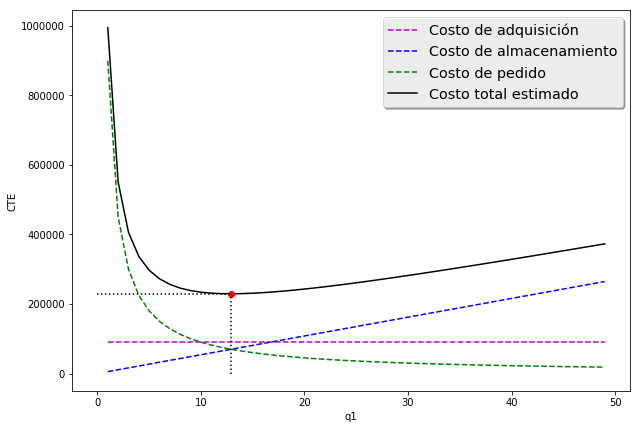

In [8]:
###### Gráficos

q_values = range(1, 50)

vect_cdemanda = []
vect_cstock = []
vect_cpedido = []
vect_cte = []

for q in q_values:
    # Actualizar vector de costo demanda:
    cdemanda_i = calcular_cadq(b, d)
    vect_cdemanda.append(cdemanda_i)
    
    # Actualizar vector de costo de almacenamiento:
    cstock_i = calcular_cstock(q, c1, t)
    vect_cstock.append(cstock_i)
    
    # Actualizar vector de costo de pedido:
    cpedido_i = calcular_cpedido(k, d, q)
    vect_cpedido.append(cpedido_i)
    
    # Actualizar vector de costo total:
    cte_i = calcular_cte(cdemanda_i, cstock_i, cpedido_i)
    vect_cte.append(cte_i)
    
# Subplots:

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(q_values, vect_cdemanda, 'm--', label='Costo de adquisición')
ax.plot(q_values, vect_cstock, 'b--', label='Costo de almacenamiento')
ax.plot(q_values, vect_cpedido, 'g--', label='Costo de pedido')
ax.plot(q_values, vect_cte, 'k', label='Costo total estimado')
ax.plot(q_opt, cte_opt, 'r', marker='o') # punto óptimo
ax.plot([0, q_opt], [cte_opt, cte_opt], 'k:')
ax.plot([q_opt, q_opt], [0, cte_opt], 'k:')

ax.set_xlabel('q1')
ax.set_ylabel('CTE')

# Leyenda:
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()